In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

%matplotlib inline

# Task 1

In [2]:
county_data = pd.read_csv('data/acs2015_county_data.csv')
county_data.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
county_data.dtypes

CensusId             int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
d

#### A) Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

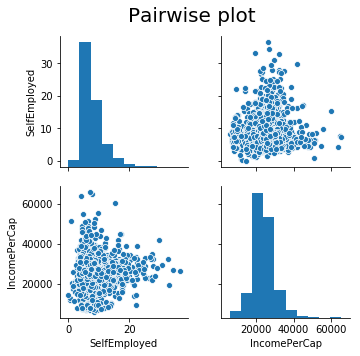

,SelfEmployed,IncomePerCap
SelfEmployed,1.000000,0.056414
IncomePerCap,0.056414,1.000000


In [4]:
def pairwise_plot(df: pd.DataFrame) -> pd.DataFrame:
    sns.pairplot(df)
    plt.suptitle('Pairwise plot', fontsize=20)
    plt.subplots_adjust(top=.9)
    plt.show()
    return df.corr(method='spearman')

pairwise_plot(county_data[['SelfEmployed','IncomePerCap']])

using spearman correlation, we can see that the percentage of self-employed citizens does not seem to correlate with the per capita income across all states.

In [5]:
def describe_data(serie: pd.Series, title, nb_bins=None, kde=True, figsize=(10, 6)) -> pd.DataFrame:
    """ Returns describe and plots of the Serie: plots are a boxplot and a histogram

    :type kde: bool
    :type nb_bins: int
    :type title: str
    :type serie: pd.Series
    :param serie: serie to be described
    :param title: title of the figure
    :param nb_bins: nb of bins of hist
    :param kde: wether or not to put a contour line in the hist
    :return: described dataframe with plots
    """
    if type(serie) != pd.core.series.Series:
        raise TypeError('serie must be a pd.Series not {}'.format(type(serie)))
    df = pd.DataFrame(data=serie)
    f, axes = plt.subplots(1, 2, figsize=figsize)
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.boxplot(data=df, ax=axes[0])
    sns.distplot(df, color="b", kde=kde, ax=axes[1], bins=nb_bins)
    plt.tight_layout()
    plt.grid(True)
    plt.suptitle(title, fontsize=20)
    plt.subplots_adjust(top=.9)
    plt.show()
    return df.describe().T


/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


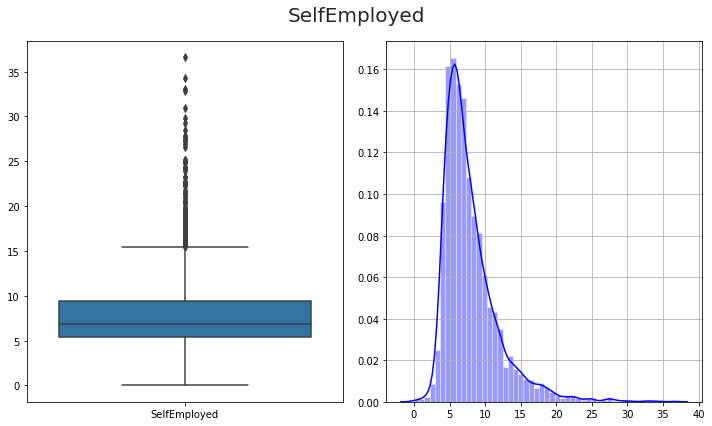

,count,mean,std,min,25%,50%,75%,max
SelfEmployed,3220.0,7.931801,3.914974,0.0,5.4,6.9,9.4,36.6


In [6]:
describe_data(county_data['SelfEmployed'], 'SelfEmployed')

**Simpson's paradox**: maybe the correlation across all states is not present, but some correlation in the data may be present if we look at the self-employment rate in each county

**Do correlation for each state**

In [37]:
def regression_plot(df: pd.DataFrame, col1: str, col2: str, title: str, figsize=(7,5)):
    """
    ScatterPlot data give dataframe df, col1 name, col2 name, title, and a linear regression model fit
    return spearman corrrelation by default
    """
    correlation_pearson = df[[col1, col2]].corr(method='pearson').iloc[0,1]
    correlation_spearman = df[[col1, col2]].corr(method='spearman').iloc[0,1]
    f, axes = plt.subplots(1, 1, figsize=figsize)
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.regplot(df[col1], df[col2], scatter_kws={'s':3, 'color': 'blue'}, line_kws={'color': 'red'}, ax=axes)
    f.suptitle(title)
    plt.show()
    
    print('Pearson correlation coefficient is: {:.2}   \n'.format(correlation_pearson))
    print('Spearman correlation coefficient is: {:.2}   \n'.format(correlation_spearman))
         
    return correlation_pearson, correlation_spearman

/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


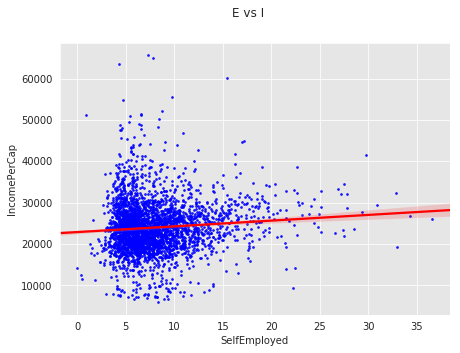

Pearson correlation coefficient is: 0.087   

Spearman correlation coefficient is: 0.056   



(0.08727386609551845, 0.05641367305318987)

In [36]:
regression_plot(county_data, 'SelfEmployed', 'IncomePerCap', title='E vs I')

/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


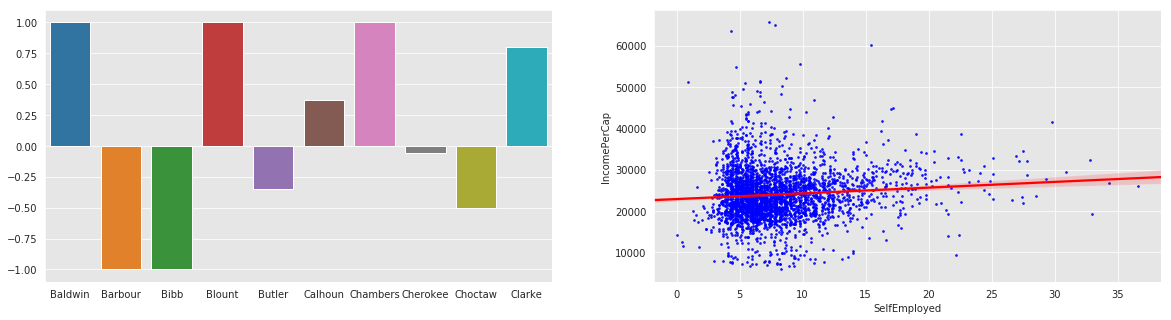

In [10]:
corr_per_county = []
counties = []
for county in list(county_data['County'].unique()): 
    a = county_data[['IncomePerCap', 'SelfEmployed']][
        county_data['County']==county].corr(method='spearman').iloc[0][1]
    if ~np.isnan(a):
        corr_per_county.append(a)
        counties.append(county)

f, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot((counties[0:10]), corr_per_county[0:10], ax=axes[0]);
sns.regplot(county_data['SelfEmployed'], county_data['IncomePerCap'], ax=axes[1], scatter_kws={'s':3, 'color': 'blue'}, line_kws={'color': 'red'})

In [51]:
def check_dataframe(df: pd.DataFrame) -> None:
    if not isinstance(df, pd.DataFrame):
        raise TypeError('df must be a df not a {}'.format(type(df)))
        
        
def simpson_correlation(df: pd.DataFrame, field_to_partition: str, partition_list: list, cols_correlated: list) -> dict:
    """
    field_to_partition: column in dataframe df eg. 'State'
    partition_list: list county_data[field_to_partition].unique().tolist(): county_data['State'].unique().tolist()
    cols_correlated: ['SelfEmployed', 'IncomePerCap']
    ele_to_plot='Connecticut'
    """

    def plot_correlation():
        f, axes = plt.subplots(1, 2, figsize=(12, 8))
        sns.set_style("darkgrid", {"axes.facecolor": ".9"})
        sns.scatterplot(x=df[cols_correlated[0]], y=df[cols_correlated[1]], ax=axes[0])
        sns.barplot(x=corrs['spearman'], y=corrs['spearman'].index.values, ax=axes[1])
        plt.title('Spearman correlation')
        plt.tight_layout()
        plt.grid(True)
        plt.suptitle('Simpson paradox', fontsize=20)
        plt.subplots_adjust(top=.9, wspace=.3)
        plt.show()

    check_dataframe(df)
    # check that partition_list is in df
    assert len([ele for ele in partition_list if ele]) == len(partition_list)

    methods = ['pearson', 'spearman']
    corrs: dict = dict.fromkeys(methods)
    for method in methods:
        correlations: list = []
        for ele in partition_list:
            correlations.append(df[cols_correlated][df[field_to_partition] == ele].corr(method=method).iloc[0, 1])
        corrs[method]: pd.Series = pd.Series(correlations, index=partition_list)
        corrs[method].dropna(axis=0, inplace=True)

    plot_correlation()
    print('Correlations: \n')
    print('\t Pearson: ')
    print('\n {}'.format(corrs['pearson']))
    print('\t Spearman:')
    print('\n {}'.format(corrs['spearman']))

    return corrs

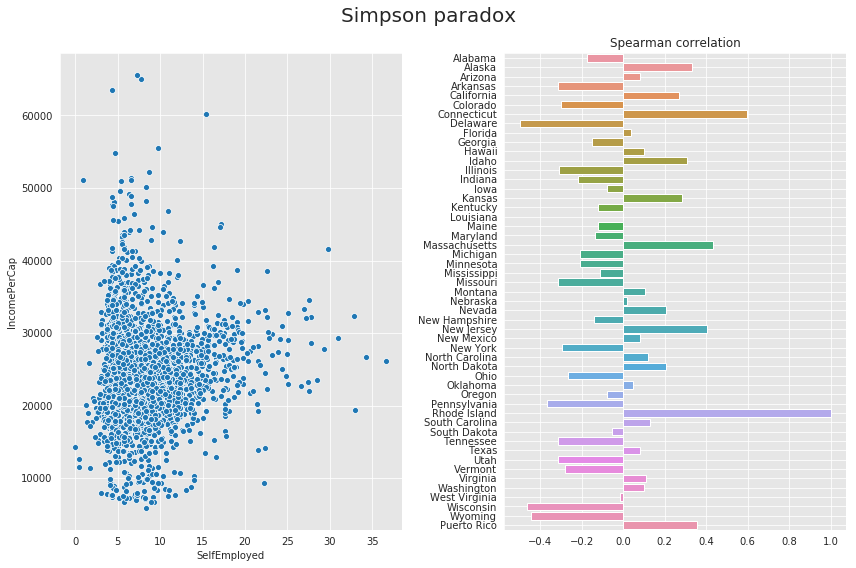

Correlations: 

	 Pearson: 

 Alabama          -0.190404
Alaska            0.296489
Arizona           0.053982
Arkansas         -0.279177
California        0.224525
Colorado         -0.287543
Connecticut       0.695530
Delaware         -0.319658
Florida           0.008813
Georgia          -0.143554
Hawaii            0.206786
Idaho             0.326819
Illinois         -0.336878
Indiana          -0.183638
Iowa             -0.145714
Kansas            0.258103
Kentucky         -0.176704
Louisiana        -0.007768
Maine            -0.063824
Maryland         -0.090483
Massachusetts     0.363002
Michigan         -0.153078
Minnesota        -0.253855
Mississippi      -0.014213
Missouri         -0.316399
Montana           0.113952
Nebraska          0.017514
Nevada            0.347809
New Hampshire    -0.151382
New Jersey        0.480448
New Mexico        0.089933
New York         -0.109081
North Carolina    0.093865
North Dakota      0.188832
Ohio             -0.204872
Oklahoma          0.20661

{'pearson': Alabama          -0.190404
 Alaska            0.296489
 Arizona           0.053982
 Arkansas         -0.279177
 California        0.224525
 Colorado         -0.287543
 Connecticut       0.695530
 Delaware         -0.319658
 Florida           0.008813
 Georgia          -0.143554
 Hawaii            0.206786
 Idaho             0.326819
 Illinois         -0.336878
 Indiana          -0.183638
 Iowa             -0.145714
 Kansas            0.258103
 Kentucky         -0.176704
 Louisiana        -0.007768
 Maine            -0.063824
 Maryland         -0.090483
 Massachusetts     0.363002
 Michigan         -0.153078
 Minnesota        -0.253855
 Mississippi      -0.014213
 Missouri         -0.316399
 Montana           0.113952
 Nebraska          0.017514
 Nevada            0.347809
 New Hampshire    -0.151382
 New Jersey        0.480448
 New Mexico        0.089933
 New York         -0.109081
 North Carolina    0.093865
 North Dakota      0.188832
 Ohio             -0.204872
 Oklahoma

In [55]:
to_analyse = 'State'
simpson_correlation(
    county_data,
    to_analyse, 
    county_data[to_analyse].unique().tolist(), 
    cols_correlated=['SelfEmployed', 'IncomePerCap']
)

#### B) The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

In [16]:
states = county_data[['SelfEmployed','IncomePerCap','State']][
    (county_data['State']=='Wisconsin') | 
    (county_data['State']=='Tennessee') | 
    (county_data['State']=='Minnesota')]
states['State'].unique()

array(['Minnesota', 'Tennessee', 'Wisconsin'], dtype=object)

In [49]:
county_data[['SelfEmployed','IncomePerCap']][county_data.State.isin(['Wisconsin', 'Tennessee','Minnesota'])].head(1)

,SelfEmployed,IncomePerCap
1314,9.2,25591


/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


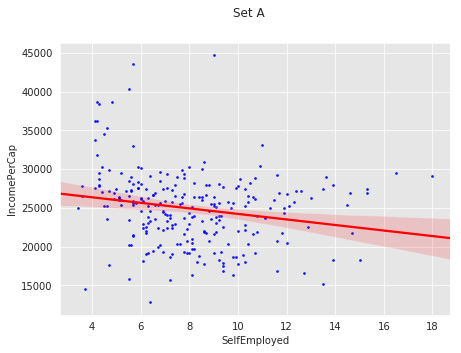

Pearson correlation coefficient is: -0.2   

Spearman correlation coefficient is: -0.24   



(-0.20229350736521487, -0.23669790001033858)

In [38]:
regression_plot(states, 'SelfEmployed', 'IncomePerCap', title='Set A')

#### C) In which state within set A is the observed effect of self-employment on per-capita income the strongest?

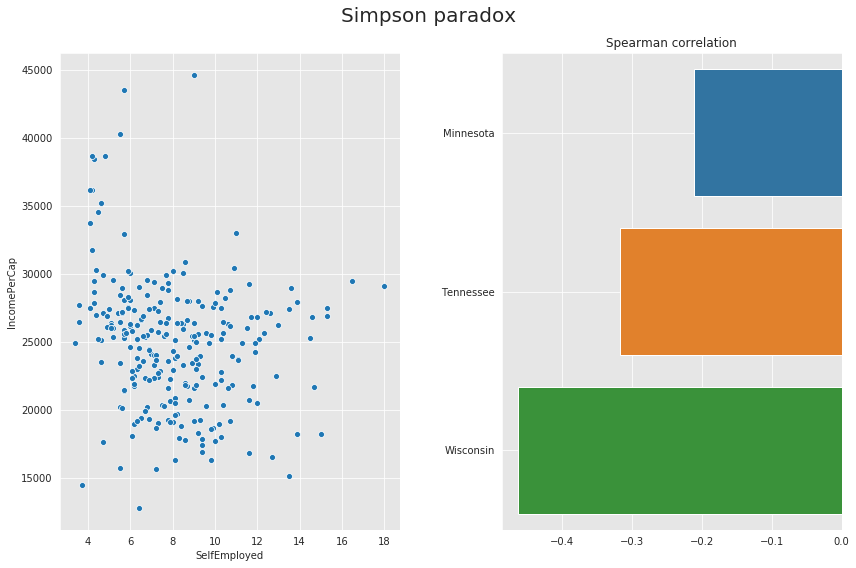

Correlations: 

	 Pearson: 

 Minnesota   -0.253855
Tennessee   -0.238360
Wisconsin   -0.329053
dtype: float64
	 Spearman:

 Minnesota   -0.211075
Tennessee   -0.316991
Wisconsin   -0.463513
dtype: float64


{'pearson': Minnesota   -0.253855
 Tennessee   -0.238360
 Wisconsin   -0.329053
 dtype: float64, 'spearman': Minnesota   -0.211075
 Tennessee   -0.316991
 Wisconsin   -0.463513
 dtype: float64}

In [54]:
simpson_correlation(states, 'State', states['State'].unique().tolist(), ['SelfEmployed','IncomePerCap'])

/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


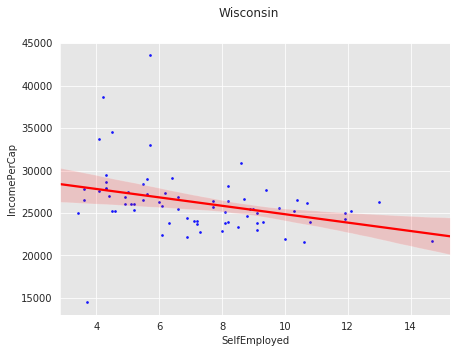

Pearson correlation coefficient is: -0.33   

Spearman correlation coefficient is: -0.46   



(-0.32905300016378525, -0.463512910440494)

In [48]:
regression_plot(states[states['State']=='Wisconsin'], 'SelfEmployed', 'IncomePerCap', title='Wisconsin')

#### D) Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

In [50]:
setB = county_data[(county_data['State']=='New Jersey') | (county_data['State']=='Kansas') | 
                   (county_data['State']=='Rhode Island') ]

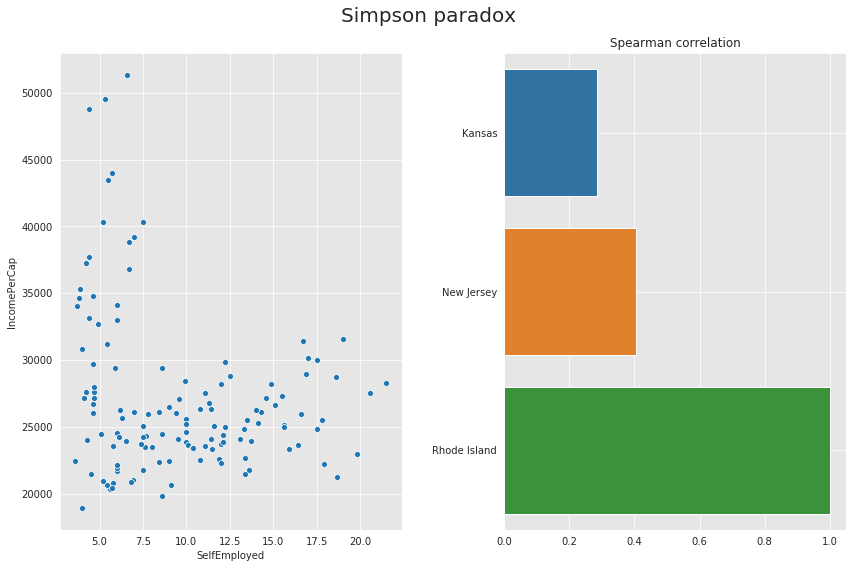

Correlations: 

	 Pearson: 

 Kansas          0.258103
New Jersey      0.480448
Rhode Island    0.902179
dtype: float64
	 Spearman:

 Kansas          0.283926
New Jersey      0.404035
Rhode Island    1.000000
dtype: float64


{'pearson': Kansas          0.258103
 New Jersey      0.480448
 Rhode Island    0.902179
 dtype: float64, 'spearman': Kansas          0.283926
 New Jersey      0.404035
 Rhode Island    1.000000
 dtype: float64}

In [56]:
simpson_correlation(setB, 'State', setB['State'].unique().tolist(), ['SelfEmployed','IncomePerCap'])

# Task 2

#### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.


In [2]:
columns_to_use = ['animal_type','intake_year', 'intake_condition', 'intake_number', 'intake_type','sex_upon_intake',
                  'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)',
                  'outcome_type']
data = pd.read_csv('data/aac_intakes_outcomes.csv', usecols=columns_to_use)
data.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


In [3]:
data.dtypes

outcome_type                 object
sex_upon_outcome             object
age_upon_outcome_(years)    float64
animal_type                  object
intake_condition             object
intake_type                  object
sex_upon_intake              object
age_upon_intake_(years)     float64
intake_year                   int64
intake_number               float64
time_in_shelter_days        float64
dtype: object

In [4]:
for col in data.select_dtypes(exclude=['float64','int64']):
    data[col] = data[col].astype('category')
data.dtypes

outcome_type                category
sex_upon_outcome            category
age_upon_outcome_(years)     float64
animal_type                 category
intake_condition            category
intake_type                 category
sex_upon_intake             category
age_upon_intake_(years)      float64
intake_year                    int64
intake_number                float64
time_in_shelter_days         float64
dtype: object

In [5]:
#dummy variable encoding 
data = pd.get_dummies(data, columns=data.select_dtypes(include='category').columns)
data.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,outcome_type_Adoption,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,10.0,10.0,2017,1.0,0.588194,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,7.0,7.0,2014,2.0,1.259722,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,6.0,6.0,2014,3.0,1.113889,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10.0,10.0,2014,1.0,4.970139,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,16.0,16.0,2013,1.0,0.119444,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [6]:
data.columns

Index(['age_upon_outcome_(years)', 'age_upon_intake_(years)', 'intake_year',
       'intake_number', 'time_in_shelter_days', 'outcome_type_Adoption',
       'outcome_type_Died', 'outcome_type_Disposal', 'outcome_type_Euthanasia',
       'outcome_type_Missing', 'outcome_type_Relocate',
       'outcome_type_Return to Owner', 'outcome_type_Rto-Adopt',
       'outcome_type_Transfer', 'sex_upon_outcome_Intact Female',
       'sex_upon_outcome_Intact Male', 'sex_upon_outcome_Neutered Male',
       'sex_upon_outcome_Spayed Female', 'sex_upon_outcome_Unknown',
       'animal_type_Bird', 'animal_type_Cat', 'animal_type_Dog',
       'animal_type_Other', 'intake_condition_Aged', 'intake_condition_Feral',
       'intake_condition_Injured', 'intake_condition_Normal',
       'intake_condition_Nursing', 'intake_condition_Other',
       'intake_condition_Pregnant', 'intake_condition_Sick',
       'intake_type_Euthanasia Request', 'intake_type_Owner Surrender',
       'intake_type_Public Assist', 'inta

In [7]:
data.drop(labels = ['outcome_type_Died', 'outcome_type_Disposal', 'outcome_type_Euthanasia',
                    'outcome_type_Missing', 'outcome_type_Relocate','outcome_type_Return to Owner', 
                    'outcome_type_Rto-Adopt','outcome_type_Transfer'], axis = 1, inplace=True)

In [8]:
# select randomly 80% data for training set, the rest for test set
train = data.sample(frac=0.8,random_state=200)
y_train = train['outcome_type_Adoption']
test = data.drop(train.index)
y_test = test['outcome_type_Adoption']

train.drop(labels='outcome_type_Adoption', axis=1, inplace=True)
test.drop(labels='outcome_type_Adoption', axis=1, inplace=True)

In [9]:
# standardize all features except label to mean 0 variance 1
def standardize_features(train, test):
    train_std = (train-train.mean())/train.std()
    test_std = (test-train.mean())/train.std()
    return train_std, test_std

In [10]:
train_st, test_st = standardize_features(train, test)

#### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

In [11]:
def predict_test_logistic(Xtr: np.array, ytr: np.array, Xte: np.array, yte: np.array, threshold) -> (np.array, LogisticRegression, np.float):
    """ Fit logistic, compute probabilities and binary predictions with accuracy.
    The predictions are positive with label equals to 1 or negative with 0.
    :param Xtr:
    :param ytr:
    :param Xte:
    :param yte:
    :param threshold:
    :return:
    """
    # check that they are not pandas
    check_array(Xtr)
    check_array(ytr)
    check_array(Xte)
    check_array(yte)
    # declare classifier
    logistic = LogisticRegression(solver='lbfgs')

    # fit the model
    logistic.fit(Xtr, ytr)

    # compute probabilities
    proba: np.array = logistic.predict_proba(Xte)

    # Compute binary predictions from probabilities with threshold
    predictions = np.fromiter(map(lambda x: 0 if x[0] > threshold else 1, proba), dtype=np.uint8)

    # compute accuracy, 1 is positive 0 is negative class
    correct: list = predictions == yte
    accuracy = sum(correct)/len(correct)
    print('Accuracy {} with {} threshold'.format(accuracy, threshold))
    return predictions, logistic, accuracy

def check_array(array: np.array) -> None:
    if not isinstance(array, np.ndarray):
        raise TypeError('array must be an array not a {}'.format(type(array)))

In [22]:
test_predictions, log_classifier, test_accuracy = predict_test_logistic(
    train_st.values, y_train.values, test_st.values, y_test.values, threshold=0.5
)

Accuracy 0.8191916656206853 with 0.5 threshold


In [23]:
def compute_metric(prediction: np.array, y: np.array, plot_the_confusion : bool = True) -> (list, dict):
    """ Compute metric f1, accuracy, precision and recall for the given labels and predictions
    :param prediction: np.array of the predicted labels
    :param y: np.array of true labels
    :return: tuple (confusion metric, {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1_score})
    """
    def confusion_Mx(prediction: np.array, y: np.array, plot_confusion: bool = True) -> list:
        """ Construct the confusing matrix. working only if labels are {0, 1}. Positive are 1, neg 0.
            TP: 1s in predictions that match 1s in y/1s in y
            FP: 1s in predictions that match 0s in y/0s in y
            TN: 0s in predictions that match 0s in y/0s in y
            FN: 0s in predictions that match 1s in y/1s in y
        """
        check_array(prediction)
        check_array(y)
        if len(set(prediction)) > 1:
            assert len(set(prediction)) == 2
            assert len(set(y)) == 2
            assert all([np.unique(y)[i] == np.unique(prediction)[i] for i in range(len(set(y)))])
        else:
            raise UserWarning('Predictions have only 1 class')

        # confusion matrix
        true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
        for true_lab, pred_lab in zip(y, prediction):
            # true positive: predicted positive and it’s true
            if true_lab == pred_lab and true_lab == 1:
                true_pos = true_pos + 1
            # true negative: predicted negative and it’s true
            if true_lab == pred_lab and true_lab == 0:
                true_neg = true_neg + 1
            # false positive: predicted positive and it’s false
            if true_lab != pred_lab and pred_lab == 1 and true_lab == 0:
                false_pos = false_pos + 1
            # predicted negative and it’s false
            if true_lab != pred_lab and pred_lab == 0 and true_lab == 1:
                false_neg = false_neg + 1

        #  shape = nb of elements under the condition
        TP = true_pos / np.where(y == 1)[0].shape[0]
        TN = true_neg / np.where(y == 0)[0].shape[0]
        FP = false_pos / np.where(y == 0)[0].shape[0]
        FN = false_neg / np.where(y == 1)[0].shape[0]

        mx: list = [[TP, FP], [FN, TN]]
        # plot the Matrix
        if plot_confusion:
            fig, ax = plt.subplots(figsize=(9, 9))
            ax.imshow(mx, cmap=plt.cm.Blues)
            ax.text(0, 0, 'True positive: {:2f}'.format(mx[0][0]), ha="center", va="center", color="w", size=14)
            ax.text(1, 0, 'False positive: {:2f}'.format(mx[0][1]), ha="center", va="center", color="b", size=14)
            ax.text(0, 1, 'False negative: {:2f}'.format(mx[1][0]), ha="center", va="center", color="b", size=14)
            ax.text(1, 1, 'True negative: {:2f}'.format(mx[1][1]), ha="center", va="center", color="w", size=14)
            plt.title('Confusion Matrix', size=14)
            ax.axis('off')

            fig.tight_layout()
            plt.show()
        return mx

    def calculate_values(confusion_Mx):
        """ Calculate accuracy, precision, recall, and F1 - score with respect to the positive and the negative class
        """
        TP = confusion_Mx[0][0]
        FP = confusion_Mx[0][1]
        FN = confusion_Mx[1][0]
        TN = confusion_Mx[1][1]
        accuracy = (TP + TN) / (TP + FP + FN + TN)

        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_score = 2 * precision * recall/ (precision + recall)
        return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1_score}

    check_array(prediction)
    check_array(y)
    confusion_mx = confusion_Mx(prediction, y, plot_confusion=plot_the_confusion)
    metrics = calculate_values(confusion_mx)
    return confusion_mx, metrics

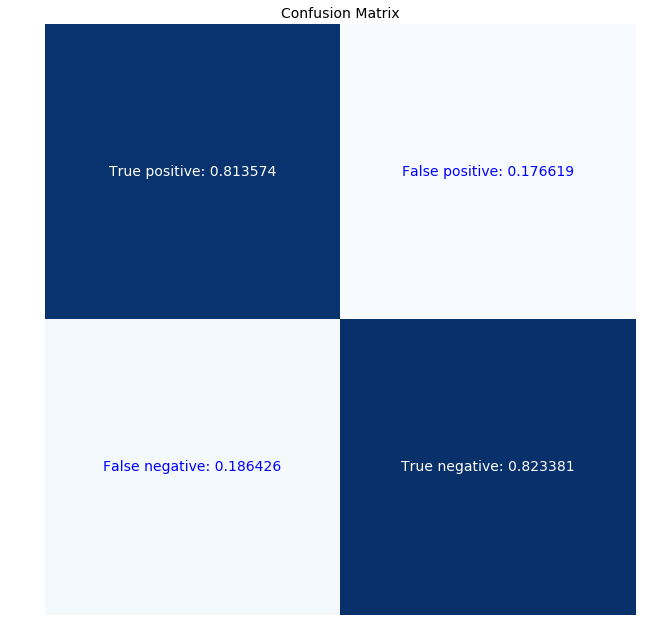

([[0.8135742617893346, 0.1766188232716117],
  [0.1864257382106655, 0.8233811767283883]],
 {'accuracy': 0.8184777192588615,
  'precision': 0.8216319362998371,
  'recall': 0.8135742617893346,
  'f1': 0.8175832464661792})

In [24]:
compute_metric(test_predictions, y_test.values, plot_the_confusion=True)

In [38]:
def evolution_metric_with_threshold(proba, y_test, plot_curves: bool = True) -> dict:
    """ Calculate the evolution of metrics depending on the threshold. Proba are the probabilities predicted
    by logistic regression, i.e. proba: np.array = logistic.predict_proba(Xtest)
    """
    def plot_metrics_threshold(the_accuracies, the_precisions, the_recalls, the_f1_scores) -> None:
        """ Plot the evolution of metrics depending on the threshold. Plot metrics for each threshold"""
        fig, ax1 = plt.subplots(1, 1, figsize=(11, 9))
        ax1.plot(the_accuracies, color='r')
        ax1.plot(the_precisions, color='y')
        ax1.plot(the_recalls, color='b')
        ax1.plot(the_f1_scores, color='g')
        ax1.legend(['accuracy', 'precision', 'recall', 'f1 score'])
        ax1.set_title('With respect to positive classe')
        ax1.set_xlabel('threshold (%)')
        plt.show()

    accuracies, precisions, recalls, f1_scores = [], [], [], []
    # for each threshold going from 0 to 1, so 0% to 100%
    for threshold in range(99, 0, -1):
        # transform proba into binary predictions according to the threshold
        
        predictions = np.fromiter(map(lambda x: 0 if x[0] > threshold/100 else 1, proba), dtype=np.uint32)
        # compute confusion matrix and metrics like f1, accuracy, recall, precision
        print(np.unique(predictions).shape)
        matrix, metrics = compute_metric(predictions, y_test, plot_the_confusion=False)
        a, p, r, f = metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1']
        accuracies.append(a)
        precisions.append(p)
        recalls.append(r)
        f1_scores.append(f)
        # store metrics
        metrics_per_threshold = {'accuracies': accuracies, 'precisions': precisions, 'recalls': recalls,
                                 'f1_score': f1_scores}
    if plot_curves:
        plot_metrics_threshold(
            the_accuracies=metrics_per_threshold['accuracies'],
            the_recalls=metrics_per_threshold['recalls'],
            the_precisions=metrics_per_threshold['precisions'],
            the_f1_scores=metrics_per_threshold['f1_score']
        )
    return metrics_per_threshold

In [39]:
proba_test = log_classifier.predict_proba(test_st.values)

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


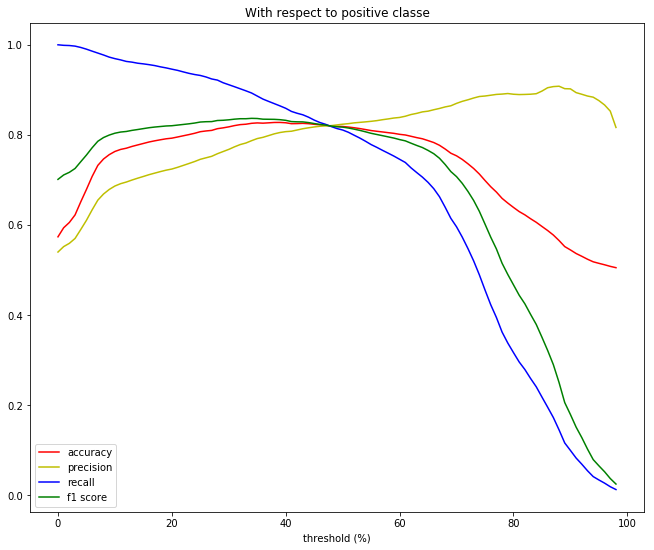

{'accuracies': [0.5733886653619624,
  0.5935088250548803,
  0.6052310515881304,
  0.621990806678184,
  0.6509260256760095,
  0.6784892191602979,
  0.7072925078301491,
  0.7318962142506678,
  0.7460364606076386,
  0.7556833095250317,
  0.7627590743285955,
  0.7672799636244755,
  0.769973127354302,
  0.7739312142488166,
  0.777248119588416,
  0.780512705092588,
  0.7837947305419024,
  0.7863820232618769,
  0.7887116120208882,
  0.7908780845786315,
  0.7922763706094738,
  0.7948437607063115,
  0.7975369244361381,
  0.8001939769366826,
  0.8030900621140507,
  0.8066086575621945,
  0.8082609535370084,
  0.8095086379557365,
  0.8132999146319917,
  0.8151278413972276,
  0.8173616110575466,
  0.8201432058520827,
  0.8223035217148402,
  0.8232038397688984,
  0.8252172480365334,
  0.8261114093956059,
  0.825526442892292,
  0.8262972932963699,
  0.8270868149845876,
  0.8271641639983229,
  0.8264372152558749,
  0.8244092321194568,
  0.8245986088380298,
  0.8251004720309879,
  0.8243735232885399,
 

In [40]:
evolution_metric_with_threshold(proba_test, y_test.values)

### D) Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

In [43]:
def grid_search_RF(X, y, k_fold, num_depth, num_trees, plot_heatmap=True, rand_seed=1, tt_ratio=0.5):
    """ Grid search using CV with random forest. X, y must be arrays """
    # check input are arrays
    check_array(X)
    check_array(y)
    accuracy = np.zeros(len(num_depth) * len(num_trees))  # accuracy array

    ct = 0  # counter
    for n_depth in num_depth:
        for n_trees in num_trees:
            # for each grid, define a random forest and evaluate the forest using crossvalidation
            RForest = RandomForestClassifier(n_estimators=n_trees, max_depth=n_depth)
            accuracy[ct] = my_cross_validation(X, y, RForest, k_fold, tt_ratio, rand_seed)
            ct += 1

    accuracy = accuracy.reshape(len(num_depth), len(num_trees))
    ind = np.unravel_index(np.argmax(accuracy, axis=None), accuracy.shape)
    best_hyperparameters = {'max_accuracy': accuracy[ind], 'best_depth': num_depth[ind[0]], 'best_tree': num_trees[ind[1]]}
    print("Best hyperparameters are: best_depth: {} n_estimators (trees) : {}".format(num_depth[ind[0]],num_trees[ind[1]]))
    if plot_heatmap:
        plot_results_RF(accuracy, ind, num_depth, num_trees)
    return best_hyperparameters

In [46]:
def split_data(x, y, ratio, myseed=1):
    """
    x, y must be arrays
    Split the dataset based on the given ratio.
    Give train, labels, ratio (arrays: if data frame do df.values)
    Returns train, test, y_train, y_test arrays
    """
    # check input are arrays
    check_array(x)
    check_array(y)
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te


# ---------------------------------------------- ML ----------------------------------------------
def clf_evaluation(clf, x_train, y_train, x_test, y_test):
    """ Evaluate the random forest given training and testing sets"""
    clf.fit(x_train, y_train)  # fit the model
    correctness: list = clf.predict(x_test) == y_test
    return sum(correctness)/len(correctness)  # accuracy


def my_cross_validation(X, y, clf, k_fold, ratio, seed):
    """ Evaluate the accuracy using cross-validating """
    pred_ratio = []
    # iterate through each train-test split
    for k in range(k_fold):
        x_train, x_test, y_train, y_test = split_data(X, y, ratio, seed) # the k-th split
        accuracy = clf_evaluation(clf, x_train, y_train, x_test, y_test) # evaluate the result
        pred_ratio.append(accuracy)
    return np.mean(pred_ratio)

def plot_results_RF(accuracy, ind, grid_params1, grid_params2):
    """ Plot heat map of the results of the grid search"""
    # plot the result of grid search
    plt.figure(figsize=(8, 6))
    ax1 = sns.heatmap(accuracy, vmin=np.min(accuracy), vmax=np.max(accuracy), cmap="YlGnBu", xticklabels=grid_params2, yticklabels=grid_params1)
    #ax1 = sns.heatmap(accuracy, vmin = 0.8, vmax = 0.86, cmap="YlGnBu", xticklabels=grid_params2, yticklabels=grid_params1)

    plt.title('accuracy distribution', fontsize=14)
    plt.xlabel('the number of trees', fontsize=14)
    plt.ylabel('depth', fontsize=14)
    plt.show()

    print('cross-validation accuracy of {:.2f}'.format(accuracy.max()*100))


Best hyperparameters are: best_depth: 14 n_estimators (trees) : 29


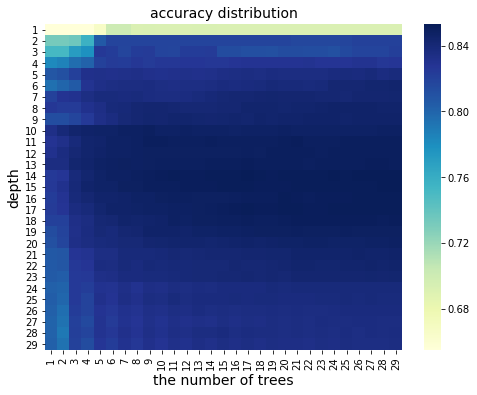

cross-validation accuracy of 85.32


{'max_accuracy': 0.8532429633813423, 'best_depth': 14, 'best_tree': 29}

In [47]:
grid_search_RF(train_st.values, y_train.values, k_fold=5, num_depth=range(1,30), num_trees=range(1,30), 
               plot_heatmap=True, rand_seed=1, tt_ratio=0.5)

### C) Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

In [51]:
def check_dataframe(df: pd.DataFrame) -> None:
    if not isinstance(df, pd.DataFrame):
        raise TypeError('df must be a df not a {}'.format(type(df)))

def check_serie(serie: pd.Series) -> None:
    if not isinstance(serie, pd.Series):
        raise TypeError('serie must be a serie not a {}'.format(type(serie)))
        
def find_feature(X: pd.DataFrame, y: pd.DataFrame, clf, k_fold=5, ratio=0.6, seed=42):
    """ For a feature matrix, find the least important feature and the accuracy after removing it.
    """
    check_dataframe(X)
    check_serie(y)

    accuracies = []
    num_features = X.shape[1]

    # interate columns for elimination
    for i in range(num_features):
        current_X: np.array = X.drop(X.columns[i], axis=1).values  # X without the i-th column
        accuracy = my_cross_validation(X=current_X, y=y.values, clf=clf, k_fold=k_fold, ratio=ratio, seed=seed)
        accuracies.append(accuracy)

    col2remove = accuracies.index(max(accuracies))
    # return the index of the least important feature and the highest accuracy
    return col2remove, max(accuracies)


def greedy_backward_selection(X: pd.DataFrame, y: pd.DataFrame, clf, ks: list, k_fold=5, ratio=0.6, seed=42):
    """

    :param X: training dataset in DataFrame format
    :param y: training labels, DataFrame
    :param clf: classifier you want to use
    :param ks: list of numbers of more features to obtain after selection [1, 5, 10]
    :param k_fold: for the cross valdiation in the process of feature selection
    :param ratio: training testing of the corss validation
    :param seed: seed
    :return: accura
    """
    check_dataframe(X)
    check_serie(y)

    greedy_X: pd.DataFrame = X.copy()
    num_features = X.shape[1]
    acc: list = []
    cols_removed: list = []

    # iteratively remove features until one left
    for i in range(num_features - 1):
        print(f"We are finding the {i}th feature.", end='\r')
        # find the least important feature and drop it
        col_index, max_acc = find_feature(greedy_X, y, clf, k_fold=k_fold, ratio=ratio, seed=seed)
        # keep track of the col removed
        cols_removed.append(X.columns[col_index])
        # remove the column
        greedy_X = greedy_X.drop(greedy_X.columns[col_index], axis=1)
        num_f = num_features - i - 1  # number of features left

        # store the performance when there are k features left
        if num_f in ks:
            acc.append(max_acc)

    return acc, greedy_X, cols_removed


def plot_backwards(ks: list, acc: list) -> None:
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.title('Accuracy of the prediction')
    plt.plot(ks, acc)
    plt.show()

In [53]:
greedy_logistic = LogisticRegression(solver='lbfgs')
greedy_logistic.fit(train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
greedy_backward_selection(train_st, y_train, clf=greedy_logistic, ks=[1, 5, 10, 15, 20, 25, 30],
                          k_fold=5, ratio=0.6, seed=42)

/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/nasrine/miniconda3/envs/ada/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: Convergence

KeyboardInterrupt: 